In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
pth = os.path.join('..', '..', '..')
pth_in = os.path.join(pth, 'data')
pth_data = os.path.join(pth_in, 'placodes')
pth_grn = os.path.join(pth_in, 'scenic', 'E9')
pth_out = os.path.join(pth, 'figures', 'E9')

In [3]:
adata = sc.read_h5ad(os.path.join(pth_data, 'E9.h5ad'))
cat = adata.var.cluster_annotations.to_dict(); adata

AnnData object with n_obs × n_vars = 1446 × 1011
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'leiden_refined', 'cluster_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells', 'cluster_annotations'
    uns: 'cluster_annotations', 'day_colors', 'hvg', 'leiden', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [4]:
# load regulons
fn = os.path.join(pth_grn, 'regulons.gmt')
reg = pd.read_csv(fn, header = None)

# construct adjacency matrix
A = pd.DataFrame(columns = adata.var_names)
src = reg[0].str[:-3]
tgt = reg[4].str[1:].str.split('\t')
for i in src.index:
    A.loc[src.loc[i]] = 0
    A.loc[src.loc[i], tgt.loc[i]] = 1

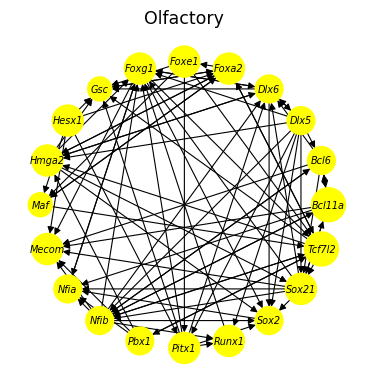

In [5]:
name = 'Olfactory'
g = A.index[A.index.map(cat) == name]
A_plt = A.loc[g, g].copy()

# graph — connected components
np.fill_diagonal(A_plt.values, 0)
msk = ((A_plt.sum() + A_plt.T.sum()) > 4)
A_plt = A_plt.loc[msk, msk]
G = nx.from_pandas_adjacency(
    A_plt, create_using = nx.DiGraph)
pos = nx.circular_layout(G)

# plot
nc, fc, ns, fs = 'yellow', 'k', 100, 7
s = ns * A_plt.index.str.len()
fig, ax = plt.subplots(1, 1, figsize = (4.5, 4.5))
nx.draw_networkx_nodes(
    G, pos,
    node_size = s,
    node_color = nc,
    ax = ax)
nx.draw_networkx_edges(
    G, pos,
    node_size = s,
    width = .8,
    ax = ax)
texts = nx.draw_networkx_labels(
    G, pos,
    font_size = fs,
    font_color = fc,
    ax = ax)
for t in texts.values():
    t.set_fontstyle('italic')
ax.set_axis_off()
ax.set_title(name, size = 12.5)
fn = os.path.join(pth_out, f'{name}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

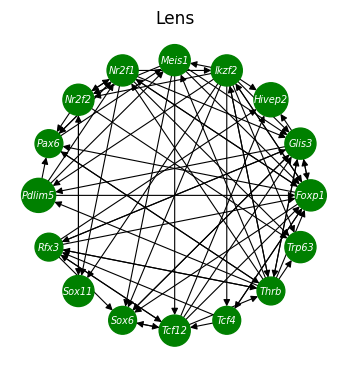

In [6]:
name = 'Lens'
g = A.index[A.index.map(cat) == name]
A_plt = A.loc[g, g].copy()

# graph — connected components
np.fill_diagonal(A_plt.values, 0)
msk = ((A_plt.sum() + A_plt.T.sum()) > 3)
A_plt = A_plt.loc[msk, msk]
G = nx.from_pandas_adjacency(
    A_plt, create_using = nx.DiGraph)
pos = nx.circular_layout(G)

# plot
nc, fc, ns, fs = 'green', 'w', 100, 7
s = ns * A_plt.index.str.len()
fig, ax = plt.subplots(1, 1, figsize = (4.25, 4.25))
nx.draw_networkx_nodes(
    G, pos,
    node_size = s,
    node_color = nc,
    ax = ax)
nx.draw_networkx_edges(
    G, pos,
    node_size = s,
    width = .8,
    ax = ax)
texts = nx.draw_networkx_labels(
    G, pos,
    font_size = fs,
    font_color = fc,
    ax = ax)
for t in texts.values():
    t.set_fontstyle('italic')
ax.set_axis_off()
ax.set_title(name, size = 12.25)
fn = os.path.join(pth_out, f'{name}.pdf')
plt.savefig(fn, bbox_inches = 'tight')